In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
## read the dataset
df=pd.read_csv("height-weight.csv")
df=pd.DataFrame(df)

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Hight')

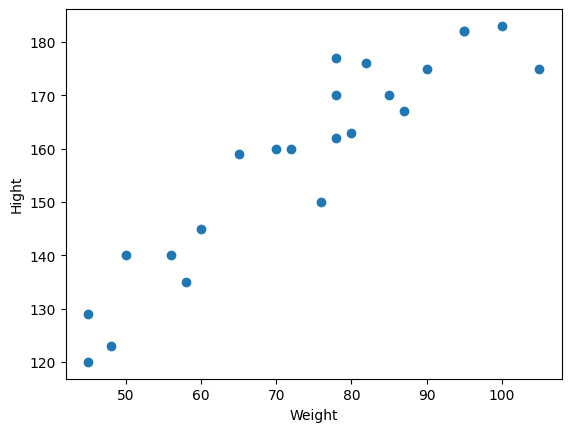

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Hight")

In [9]:

##divide our dataset into independent and dependent features
X = df['Weight']
y = df['Height']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [11]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [12]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [13]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test=scaler.transform(X_test.values.reshape(-1, 1))

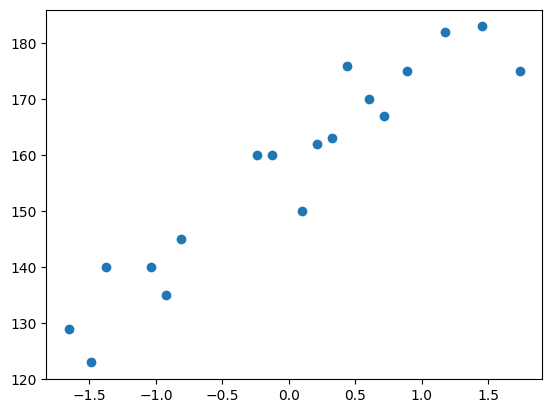

In [14]:
plt.scatter(X_train,y_train)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [17]:
regressor

LinearRegression()

In [18]:
type(X_train)

numpy.ndarray

In [19]:

X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [20]:
type(X_train)

numpy.ndarray

In [21]:

y_train.shape

(18,)

In [22]:
regressor.fit(X_train,y_train)

LinearRegression()

In [23]:
## corfficient and intercept
print("Cofficient :",regressor.coef_)
print("Intercept :",regressor.intercept_)

Cofficient : [17.03440872]
Intercept : 157.5


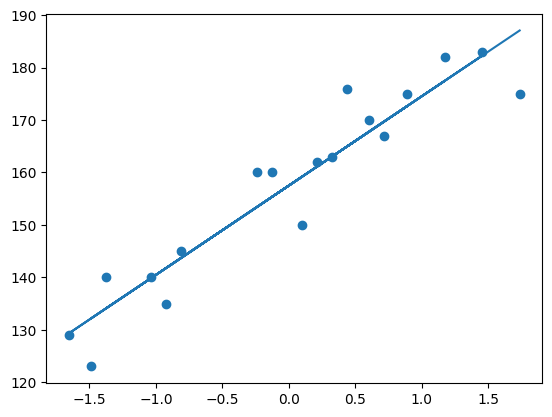

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

## prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)

## prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [25]:
y_pred_test=regressor.predict(X_test)

In [26]:
print(y_test,y_pred_test)

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64 [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


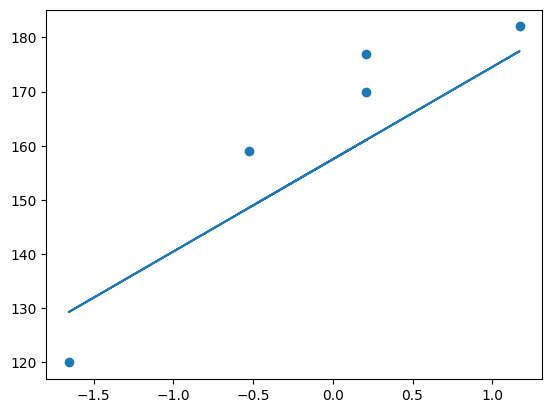

In [27]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [28]:
## Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:

mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


109.77592599051654
9.822657814519227
10.477400726827076


In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [31]:
print(score)

0.7769869860423441


## R Square
Formula

R^2=1-SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)

0.7769869860423441


#### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables



In [33]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [34]:
regressor.predict(scaler.transform([[75]]))

array([158.19553315])

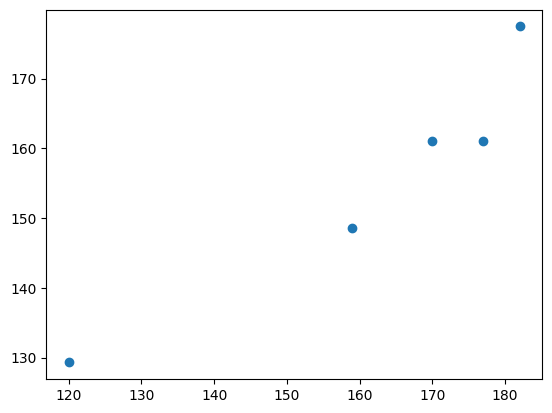

In [35]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [36]:
## Residuals
residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

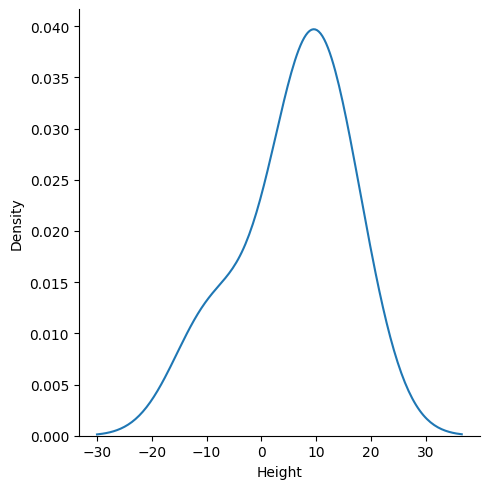

In [37]:
## Plot this residuals
import seaborn as sns
sns.displot(residuals,kind='kde')

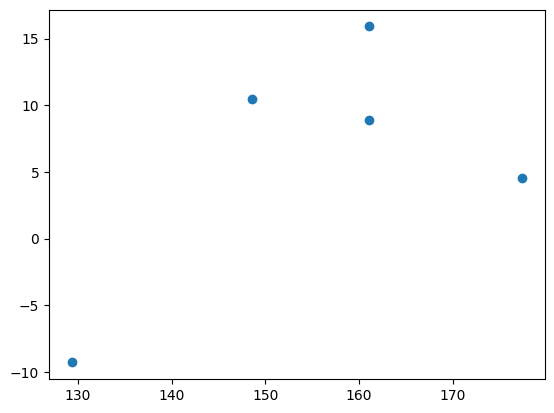

In [38]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

### Using OLS

In [39]:
import statsmodels.api as sm

In [40]:
model = sm.OLS(y_train, X_train).fit()
predications = model.predict(X_test)

In [41]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Sun, 16 Nov 2025   Prob (F-statistic):                       0.661
Time:                        01:27:37   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/priyanshuyadav/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [42]:
regressor.coef_

array([17.03440872])